In [ ]:
from transformers import GPT2LMHeadModel
from transformers import pipeline, set_seed
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2")
sd_hf = model_hf.state_dict()

for k,v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [ ]:
# Reshape the entire embedding matrix to a flat vector and display the first 20 values
sd_hf["transformer.wte.weight"].view(-1)[:20]

tensor([-0.1101, -0.0393,  0.0331,  0.1338, -0.0485, -0.0789, -0.2398, -0.0895,
         0.0253, -0.1074, -0.1811, -0.0672,  0.0739, -0.0161,  0.0117,  0.1245,
        -0.0020, -0.0815,  0.0338,  0.2365])

In [ ]:
print(sd_hf["transformer.wte.weight"].shape) #(Vocabulary size:unique tokens,  Embedding dimension)

torch.Size([50257, 768])


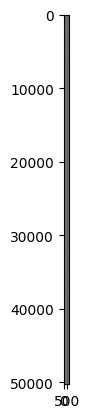

In [ ]:
# Toke embedding visualization
plt.imshow(sd_hf["transformer.wte.weight"], cmap="gray")

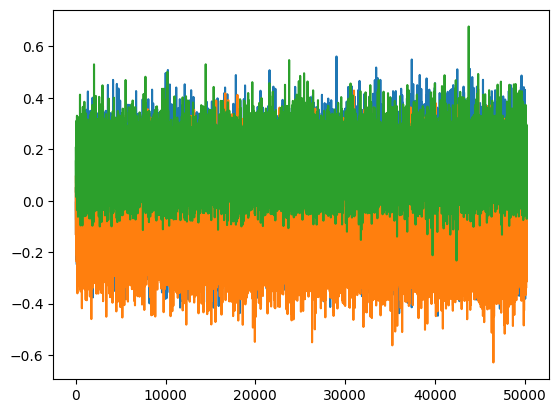

In [ ]:
# visualization of 150th dimension(150th colum) of all token embedding
plt.plot(sd_hf["transformer.wte.weight"][:,150])
plt.plot(sd_hf["transformer.wte.weight"][:,200])
plt.plot(sd_hf["transformer.wte.weight"][:,250])

In [ ]:
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, but what I'm really doing is making a human-readable document. There are other languages, but those are"},
 {'generated_text': "Hello, I'm a language model, not a syntax model. That's why I like it. I've done a lot of programming projects.\n"},
 {'generated_text': "Hello, I'm a language model, and I'll do it in no time!\n\nOne of the things we learned from talking to my friend"},
 {'generated_text': "Hello, I'm a language model, not a command line tool.\n\nIf my code is simple enough:\n\nif (use (string"},
 {'generated_text': "Hello, I'm a language model, I've been using Language in all my work. Just a small example, let's see a simplified example."}]

In [ ]:
class Block(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.ln_1 = nn.LayerNorm(config.n_embd)
        self.attn = MultiHeadAttention(config)
        self.ln_2 = nn.LayerNorm(config.n_embd)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install torch torchvision torchaudio

In [3]:
!pip install transformers

In [4]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 44.7 MB/s eta 0:00:00


In [5]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.3 MB/s eta 0:00:00


In [6]:
!python /content/drive/MyDrive/Medical_LLM/medical.py

Streaming output truncated to the last 5000 lines.
Shard 2154: 100% 1000/1000 [00:00<00:00, 145252.25tokens/s]
Shard 2155: 100% 1000/1000 [00:00<00:00, 111213.45tokens/s]
Shard 2156: 100% 1000/1000 [00:00<00:00, 37883.11tokens/s]
Shard 2157: 100% 1000/1000 [00:00<00:00, 143699.60tokens/s]
Shard 2158: 100% 1000/1000 [00:00<00:00, 199311.16tokens/s]
Shard 2159: 100% 1000/1000 [00:00<00:00, 159200.79tokens/s]
Shard 2160: 100% 1000/1000 [00:00<00:00, 149844.74tokens/s]
Shard 2161: 100% 1000/1000 [00:00<00:00, 139156.10tokens/s]
Shard 2162: 100% 1000/1000 [00:00<00:00, 147520.54tokens/s]
Shard 2163: 100% 1000/1000 [00:00<00:00, 139341.02tokens/s]
Shard 2164: 100% 1000/1000 [00:00<00:00, 149019.54tokens/s]
Shard 2165: 100% 1000/1000 [00:00<00:00, 159667.44tokens/s]
Shard 2166: 100% 1000/1000 [00:00<00:00, 122247.27tokens/s]
Shard 2167: 100% 1000/1000 [00:00<00:00, 141231.87tokens/s]
Shard 2168: 100% 1000/1000 [00:00<00:00, 155563.53tokens/s]
Shard 2169: 100% 1000/1000 [00:00<00:00, 36008.48t

In [ ]:
!python /content/drive/MyDrive/Medical_LLM/train_gpt2.py

Traceback (most recent call last):
  File "/content/drive/MyDrive/Medical_LLM/train_gpt2.py", line 5, in <module>
    import torch
  File "/usr/local/lib/python3.10/dist-packages/torch/__init__.py", line 368, in <module>
    from torch._C import *  # noqa: F403
  File "<frozen importlib._bootstrap>", line 216, in _lock_unlock_module
KeyboardInterrupt
^C


In [ ]:
data_path = '/content/drive/MyDrive/Medical_LLM/output_data/Medical_QA_Dataset.txt'

with open(data_path, 'r', encoding='utf-8') as f:
    text = f.read()
dataset = text[:1000]
print(dataset[:100])

Question: What is (are) Hypothalamic dysfunction ?
Answer: Hypothalamic dysfunction refers to a cond


In [ ]:
import tiktoken
enc = tiktoken.get_encoding('gpt2')
tokens = enc.encode(dataset)
print(tokens[:24])

[24361, 25, 1867, 318, 357, 533, 8, 21209, 42376, 18127, 19327, 5633, 198, 33706, 25, 21209, 42376, 18127, 19327, 10229, 284, 257, 4006, 287]


In [ ]:
import torch
buf = torch.tensor(tokens[:24 + 1])
x = buf[:-1].view(4, 6)
y = buf[1:].view(4, 6)
print(x)
print(y)


tensor([[24361,    25,  1867,   318,   357,   533],
        [    8, 21209, 42376, 18127, 19327,  5633],
        [  198, 33706,    25, 21209, 42376, 18127],
        [19327, 10229,   284,   257,  4006,   287]])
tensor([[   25,  1867,   318,   357,   533,     8],
        [21209, 42376, 18127, 19327,  5633,   198],
        [33706,    25, 21209, 42376, 18127, 19327],
        [10229,   284,   257,  4006,   287,   543]])


In [ ]:
import os

myfile = "G:\My Drive\Medical_LLM\medical_dataset_cache"
# If file exists, delete it.
if os.path.isfile(myfile):
    os.remove(myfile)
else:
    # If it fails, inform the user.
    print("Error: %s file not found" % myfile)

In [ ]:
data_path = '/content/drive/MyDrive/Medical_LLM/output_data/Medical_QA_Dataset.txt'

with open(data_path, 'r', encoding='utf-8') as f:
    text = f.read()
dataset = text[:1000]
print(dataset[:100])

Question: What is (are) Hypothalamic dysfunction ?
Answer: Hypothalamic dysfunction refers to a cond


In [ ]:
!python /content/drive/MyDrive/Medical_LLM/train_gpt2.py

using device: cuda
loaded 10638625 tokens
1 epoch = 649 batches
Traceback (most recent call last):
  File "/content/drive/MyDrive/Medical_LLM/train_gpt2.py", line 235, in <module>
    logits, loss = model(x, y)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1553, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1562, in _call_impl
    return forward_call(*args, **kwargs)
  File "/content/drive/MyDrive/Medical_LLM/train_gpt2.py", line 121, in forward
    x = block(x)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1553, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1562, in _call_impl
    return forward_call(*args, **kwargs)
  File "/content/drive/MyDrive/Medical_LLM/train_gpt2.py", line 67, in forward
    x = x + self.at

In [ ]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sz = "124M"

loss_baseline = {
    "124M": 3.2924,
}[sz]
hella2_baseline = { # HellaSwag for GPT-2
    "124M": 0.294463,
    "350M": 0.375224,
    "774M": 0.431986,
    "1558M": 0.488946,
}[sz]
hella3_baseline = { # HellaSwag for GPT-3
    "124M": 0.337,
    "350M": 0.436,
    "774M": 0.510,
    "1558M": 0.547,
}[sz]

# load the log file
with open("log124M_40B/log.txt", "r") as f:
    lines = f.readlines()

# parse the individual lines, group by stream (train,val,hella)
streams = {}
for line in lines:
    step, stream, val = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    streams[stream][int(step)] = float(val)

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))

# create figure
plt.figure(figsize=(16, 6))

# Panel 1: losses: both train and val
plt.subplot(121)
xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'nanogpt ({sz}) train loss')
print("Min Train Loss:", min(ys))
xs, ys = streams_xy["val"] # validation loss
plt.plot(xs, ys, label=f'nanogpt ({sz}) val loss')
# horizontal line at GPT-2 baseline
if loss_baseline is not None:
    plt.axhline(y=loss_baseline, color='r', linestyle='--', label=f"OpenAI GPT-2 ({sz}) checkpoint val loss")
plt.xlabel("steps")
plt.ylabel("loss")
plt.yscale('log')
plt.ylim(top=4.0)
plt.legend()
plt.title("Loss")
print("Min Validation Loss:", min(ys))

# Panel 2: HellaSwag eval
plt.subplot(122)
xs, ys = streams_xy["hella"] # HellaSwag eval
ys = np.array(ys)
plt.plot(xs, ys, label=f"nanogpt ({sz})")
# horizontal line at GPT-2 baseline
if hella2_baseline:
    plt.axhline(y=hella2_baseline, color='r', linestyle='--', label=f"OpenAI GPT-2 ({sz}) checkpoint")
if hella3_baseline:
    plt.axhline(y=hella3_baseline, color='g', linestyle='--', label=f"OpenAI GPT-3 ({sz}) checkpoint")
plt.xlabel("steps")
plt.ylabel("accuracy")
plt.legend()
plt.title("HellaSwag eval")
print("Max Hellaswag eval:", max(ys))

FileNotFoundError: [Errno 2] No such file or directory: 'log124M_40B/log.txt'